In [1]:
import pandas as pd
import numpy as nm
import seaborn as sn
import matplotlib.pyplot as pn

In [2]:
df = pd.read_csv(r"C:\Users\abhis\Downloads\uber.csv")

In [3]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [6]:
df.drop(['Unnamed: 0', 'key'], inplace=True, axis=1)

In [7]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [8]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [9]:
import calendar
df['hour'] = df['pickup_datetime'].apply(lambda x: x.hour)
df['day'] = df['pickup_datetime'].apply(lambda x: x.day)
df['month'] = df['pickup_datetime'].apply(lambda x: x.month)
df['year'] = df['pickup_datetime'].apply(lambda x: x.year)
df['weekday'] = df['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])
df.weekday = df.weekday.map({'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6})


In [10]:
df.drop(['pickup_datetime'], inplace=True, axis=1)

In [11]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,4
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,5
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,5
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,4
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,0
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,5
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,1
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,3


In [12]:
def find_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1

    outliers = df[((df < (q1 - (1.5 * iqr))) | (df > (q3 + (1.5 * iqr))))]
    return outliers

In [13]:
outliers = find_outliers(df['fare_amount'])
print(len(outliers))
print(outliers.max())
print(outliers.min())

17166
499.0
-52.0


In [14]:
def find_dist(longitude1, latitude1, longitude2, latitude2):
    long1, lat1, long2, lat2 = map(nm.radians, [longitude1, latitude1, longitude2, latitude2])
    del_lat = lat2 - lat1
    del_long = long2 - long1
    a = nm.sin(del_lat/2)**2 + nm.cos(lat1) * nm.cos(lat2) * nm.sin(del_long/2)**2
    c = 2 * nm.arcsin(nm.sqrt(a)) * 6371
    return c

In [15]:
df['Distance'] = find_dist( df['pickup_longitude'],
    df['pickup_latitude'],
    df['dropoff_longitude'],
    df['dropoff_latitude'])

In [17]:
df.drop(df[df['Distance'] >= 60].index, inplace=True)
df.drop(df[df['fair_amount'] <= 0].index, inplace=True)
df.drop(df[df['Distance'] < 1 & df['fare_amount'] > 100].index, inplace=True)
df.drop(df[df['Distance'] > 100 & df['fare_amount'] < 100].index, inplace=True)

KeyError: 'fair_amount'

In [ ]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,4,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,5,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,1,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,5,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,4,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,0,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,5,1.875050
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,1,12.850319
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,3,3.539715


<Axes: >

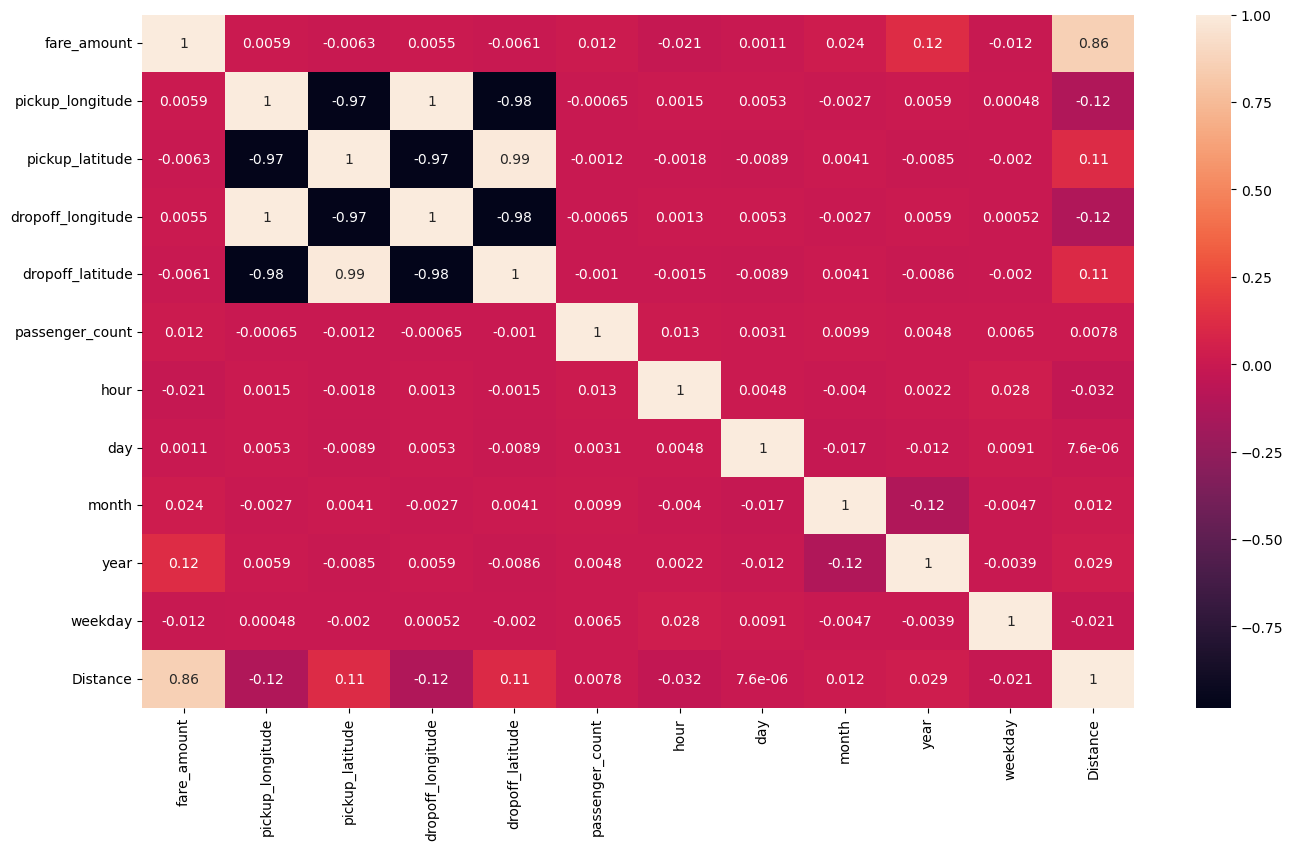

In [ ]:
pn.figure(figsize=(16,9))
sn.heatmap(df.corr(), annot=True)

In [ ]:
x = df['Distance'].values.reshape(-1, 1)
y = df['fare_amount'].values.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.50, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(x_train, y_train)
y_pred = ln.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
mean_squared_error(y_test, y_pred)

0.27150057864971855

In [ ]:
r2_score(y_test, y_pred)

0.7315077231214984

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rnn = RandomForestRegressor(n_estimators=100, random_state=10)
y_train = nm.ravel(y_train)
rnn.fit(x_train, y_train)
y_pred = rnn.predict(x_test)

In [ ]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.3218273604669403
0.6817385760158979
